## Exercise 2

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 


1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.



Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Univariate analysis (Categorical)

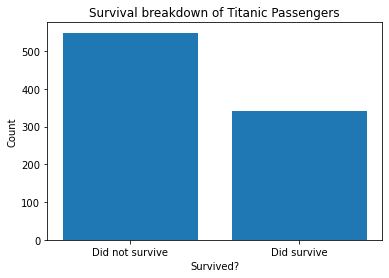

In [5]:
plt.bar(['Did not survive', 'Did survive'], df.Survived.value_counts());
plt.title("Survival breakdown of Titanic Passengers");
plt.xlabel('Survived?');
plt.ylabel("Count");

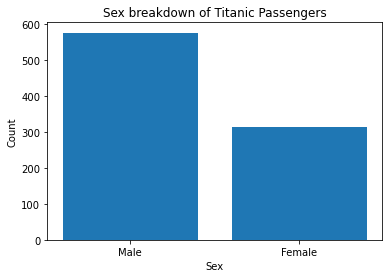

In [6]:
plt.bar(['Male', 'Female'], df.Sex.value_counts());
plt.title("Sex breakdown of Titanic Passengers");
plt.xlabel('Sex');
plt.ylabel("Count");

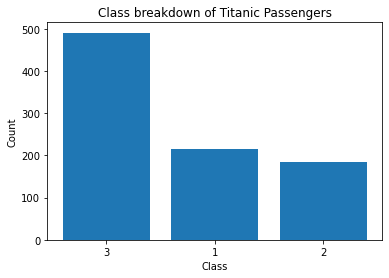

In [7]:
plt.bar(['3', '1', '2'], df.Pclass.value_counts());
plt.title("Class breakdown of Titanic Passengers");
plt.xlabel('Class');
plt.ylabel("Count");

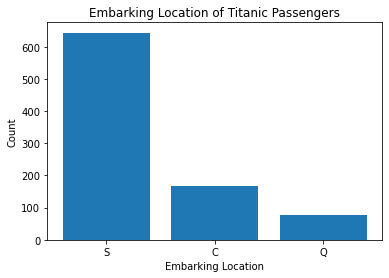

In [8]:
plt.bar(['S', 'C', 'Q'], df.Embarked.value_counts());
plt.title("Embarking Location of Titanic Passengers");
plt.xlabel('Embarking Location');
plt.ylabel("Count");

# Univariate analysis (Numerical)

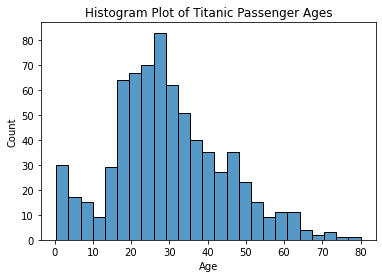

In [9]:
sns.histplot(df['Age'], bins = 25);
plt.title("Histogram Plot of Titanic Passenger Ages");

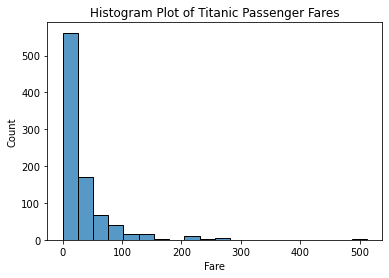

In [51]:
sns.histplot(df['Fare'], bins = 20);
plt.title("Histogram Plot of Titanic Passenger Fares");

# Hypothesis 1: Is survival rate associated with Gender?

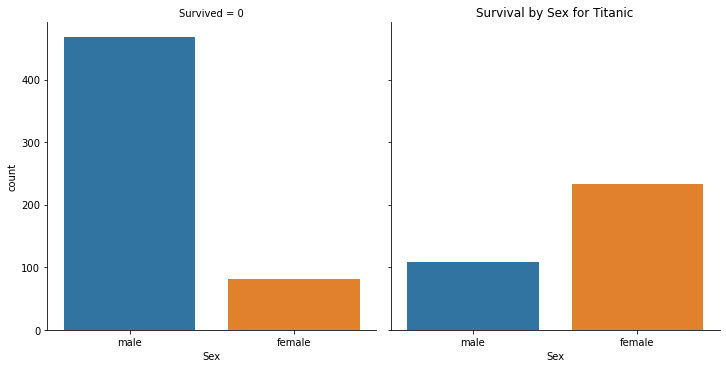

In [52]:
sns.catplot(x='Sex', col='Survived', kind='count', data=df);
plt.title("Survival by Sex for Titanic");

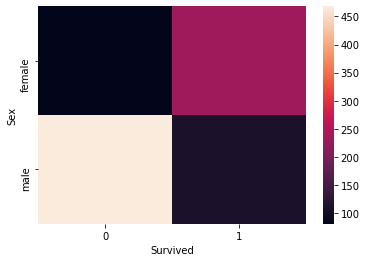

In [53]:
sns.heatmap(pd.crosstab(df['Sex'], df['Survived']));

In [35]:
pd.crosstab(df['Sex'], df['Survived'], margins = True, normalize= "index")

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908
All,0.616162,0.383838


We can see that 74% of females survived, while only 18% of males survived.

In [36]:
pd.crosstab(df['Sex'], df['Survived'], margins = True, normalize= "columns")

Survived,0,1,All
Sex,,,
female,0.147541,0.681287,0.352413
male,0.852459,0.318713,0.647587


Of the survivors, 68% were female, while only 32% were male. However of total passengers the breakdown is 65% male, and 35% female.

# Hypothesis 2: Is survival rate associated with class?

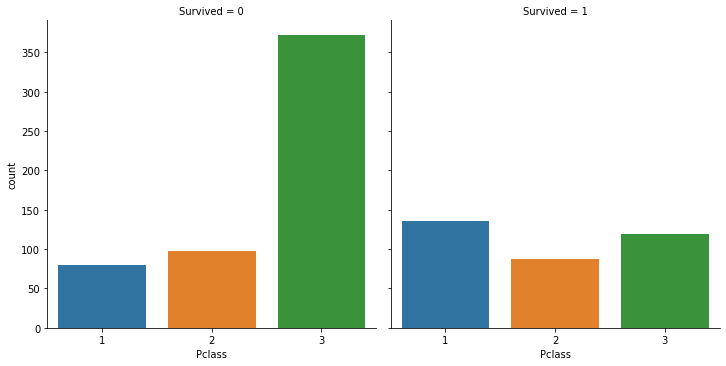

In [38]:
sns.catplot(x='Pclass', col='Survived', kind='count', data=df);

In [43]:
pd.crosstab(df['Pclass'], df['Survived'], margins = True, normalize= "index")

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363
All,0.616162,0.383838


62% of upper class (Pclass = 1) passengers survived, while only 24% of lower class (Pclass = 3) passengers survived. This would indicate that survival rate is likely associated with class. The higher the class of the passenger, the more likely they were to survive.

# Hypothesis 3: Is Fare associated with age? i.e did younger people pay less than older people?

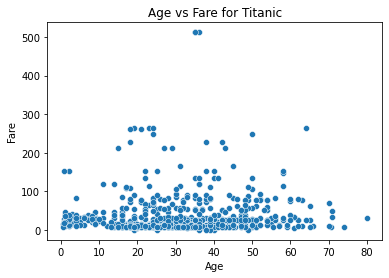

In [55]:
sns.scatterplot(data=df, x='Age', y='Fare');
plt.title('Age vs Fare for Titanic');

In [48]:
df[['Age', 'Fare']].corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


From the Scatterplot and the correlation coefficient, we can conclude there is no statistically significant association between the age and the fare of the titanic passengers. There also seems to be significant outliers, with some passengers fare being in the 300-500 range, while many people paid close to 0.